Wendy Total Movie Sales – Marvel vs DC Type of Graph: Line Graph X-axis: 1 to 20 years Y-axis: Sales What do we want to find out? Over 20 years, did Marvel sell tickets than DC.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import requests


In [3]:
# CSV file into dataframe  (https://www.statcrunch.com/app/index.php?dataid=1150559)
marvel_dc_movie_list = pd.read_csv('dc_and_marvel_sales_1966-2016.csv').sort_values(["Company","Release"])
marvel_dc_movie_list.head()


,Company,Film,Release,Adjusted,Worldwide,Domestic,Foreign
56,DC,Batman: The Movie,1966,22.060185,3.000000,3.000000,NaN
4,DC,Superman,1978,1097.039000,300.218018,134.218018,166.0
32,DC,Superman II,1980,312.806365,108.185706,108.185706,NaN
44,DC,Superman III,1983,143.405983,59.950623,59.950623,NaN
54,DC,Supergirl,1984,32.782737,14.296438,14.296438,NaN


In [4]:
#Marvel list of movies
marvel_movies =marvel_dc_movie_list.loc[marvel_dc_movie_list['Company'] == 'Marvel']
marvel_movies=pd.DataFrame(marvel_movies)
marvel_movies.head()

,Company,Film,Release,Adjusted,Worldwide,Domestic,Foreign
48,Marvel,Howard the Duck,1986,82.524005,37.962774,16.295774,21.667000
60,Marvel,The Punisher,1989,1.024880,0.533411,33.810189,0.533411
41,Marvel,Blade,1998,191.745252,131.183530,70.087718,61.095812
25,Marvel,X-Men,2000,410.005182,296.339527,157.299717,139.039810
5,Marvel,Spider-Man,2002,1088.227139,821.708551,403.706375,418.002176


In [5]:
dc_movies =marvel_dc_movie_list.loc[marvel_dc_movie_list['Company'] == 'DC']
dc_movies=pd.DataFrame(dc_movies)
dc_movies.head()

,Company,Film,Release,Adjusted,Worldwide,Domestic,Foreign
56,DC,Batman: The Movie,1966,22.060185,3.000000,3.000000,NaN
4,DC,Superman,1978,1097.039000,300.218018,134.218018,166.0
32,DC,Superman II,1980,312.806365,108.185706,108.185706,NaN
44,DC,Superman III,1983,143.405983,59.950623,59.950623,NaN
54,DC,Supergirl,1984,32.782737,14.296438,14.296438,NaN


### Sales by year

In [6]:
#Marvel movies grouped by year and domestic sales
grouped_marvel_movies =marvel_dc_movie_list.loc[marvel_dc_movie_list['Company'] == 'Marvel'].groupby('Release')['Domestic'].sum()
grouped_marvel_movies =pd.DataFrame(grouped_marvel_movies)
grouped_marvel_movies.head()

,Domestic
Release,
1986,16.295774
1989,33.810189
1998,70.087718
2000,157.299717
2002,486.054694


In [7]:
#DC grouped by year and domestic sales
grouped_dc_movies = marvel_dc_movie_list.loc[marvel_dc_movie_list['Company'] == 'DC'].groupby('Release')['Domestic'].sum()#.reset_index(drop =False)
grouped_dc_movies =pd.DataFrame(grouped_dc_movies )
grouped_dc_movies.head()

,Domestic
Release,
1966,3.000000
1978,134.218018
1980,108.185706
1983,59.950623
1984,14.296438


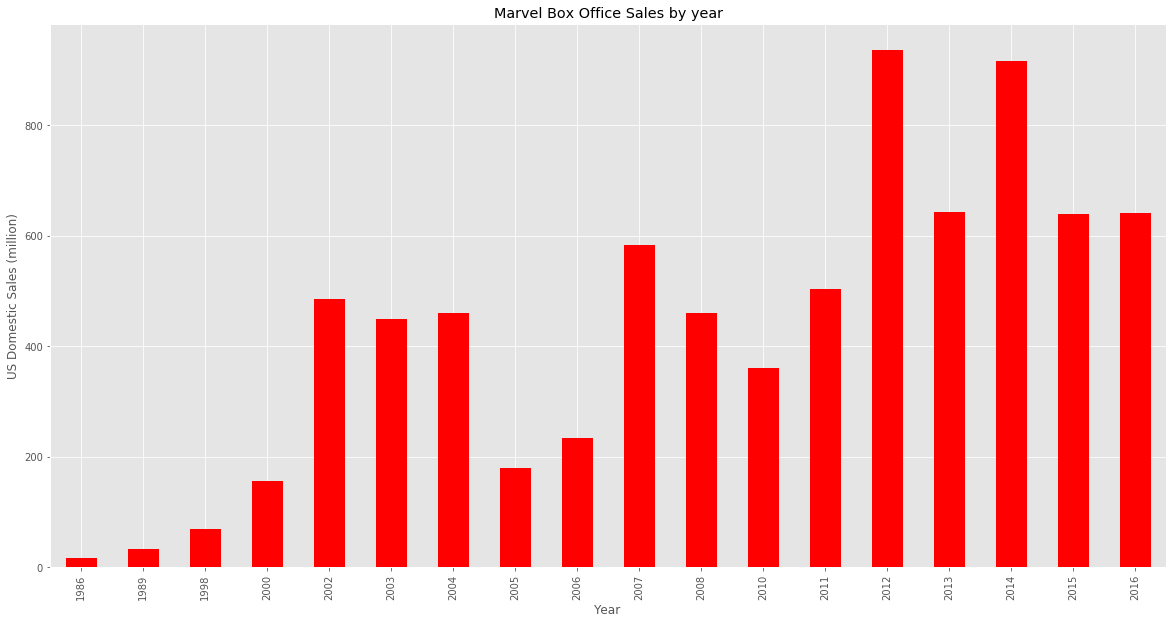

In [8]:
grouped_marvel_movies["Domestic"].plot(kind='bar', color ="red", figsize=(20, 10))

plt.title("Marvel Box Office Sales by year")
plt.xlabel("Year")
plt.ylabel("US Domestic Sales (million)")

# Incorporate a text label regarding circle size
#plt.text(42, 35, "Note: 1986 Fist feature length film recognized by OMDB and wikipedia"\
#                        "Total number of year with movie produced = 18")

# Save Figure
plt.savefig("Marvel_Sales.png")

plt.show()



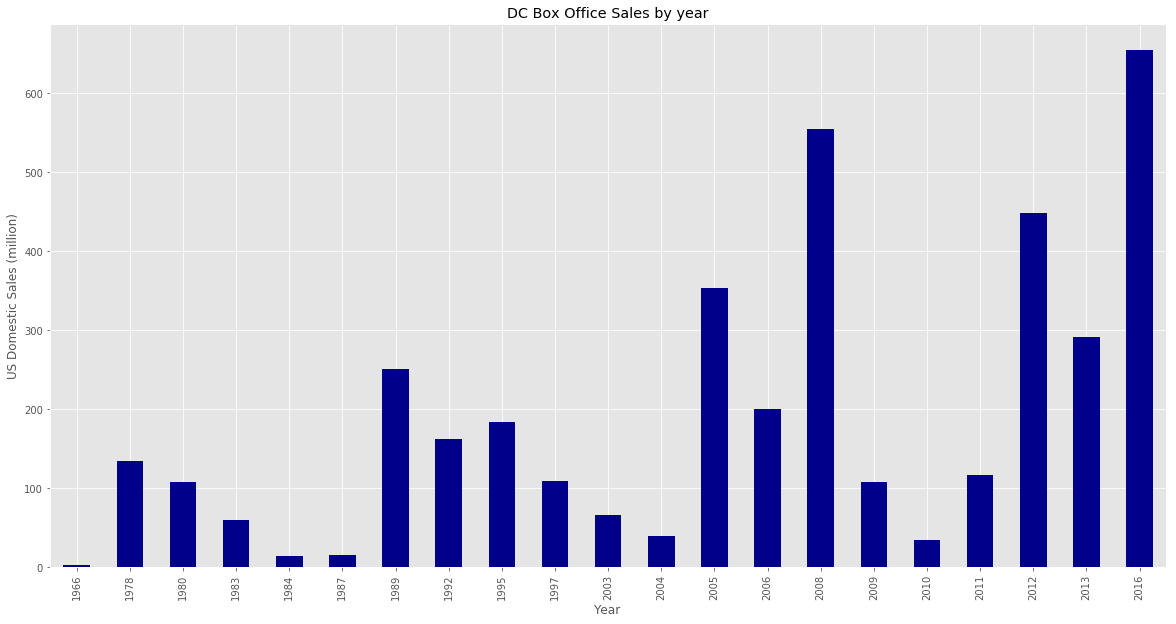

In [9]:
grouped_dc_movies["Domestic"].plot(kind='bar', color ="darkblue",figsize=(20, 10))

plt.title("DC Box Office Sales by year")
plt.xlabel("Year")
plt.ylabel("US Domestic Sales (million)")

plt.savefig("DC_Sales.png")
plt.show()

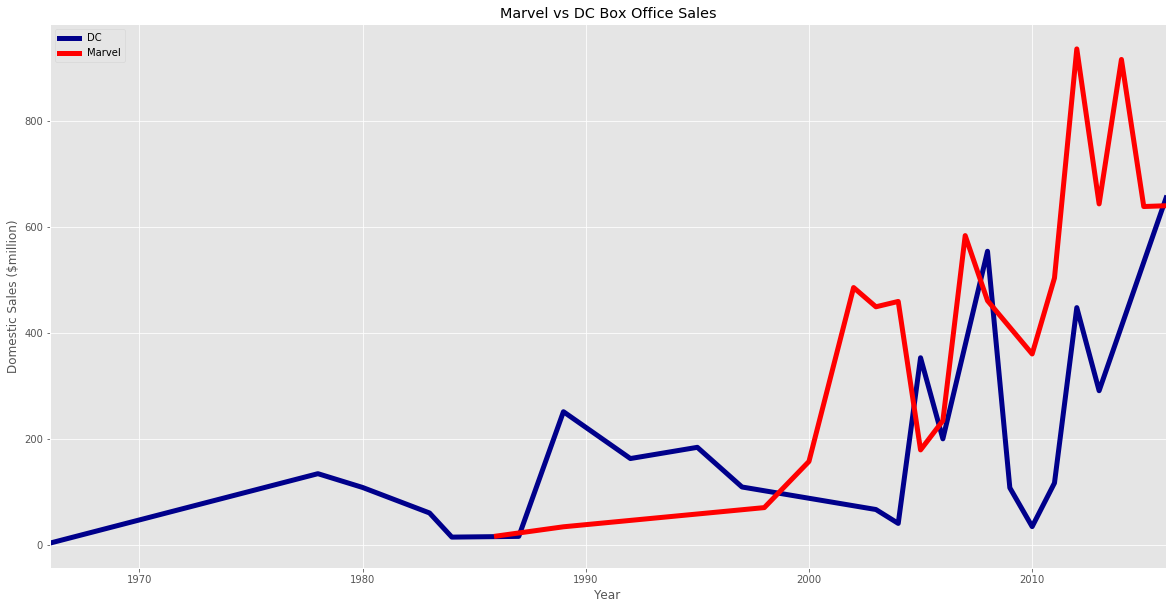

In [15]:
grouped_dc_movies["Domestic"].plot(kind='line', color ="darkblue", label ="DC",figsize=(20, 10), linewidth=5)
grouped_marvel_movies["Domestic"].plot(kind='line', color ="red", label="Marvel",figsize=(20, 10),linewidth=5)

plt.title("Marvel vs DC Box Office Sales")
plt.xlabel("Year")
plt.ylabel("Domestic Sales ($million)")
plt.savefig("Domestic Sales.png")

plt.legend(loc="best")
plt.show()

### Average sales per movie Marvel v DC

In [16]:
marvel_dc_movie_list.groupby('Company')["Domestic"].sum()/marvel_dc_movie_list.groupby('Company')["Film"].count()

Company
DC        139.652141
Marvel    194.378488
dtype: float64

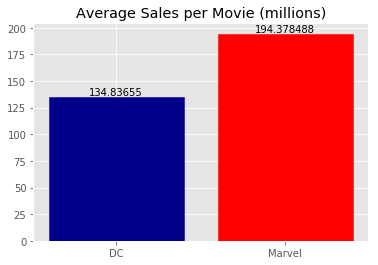

In [17]:
x_axis= ["DC","Marvel"] 
y_axis = [134.836550, 194.378488]

barlist = plt.bar(x_axis,y_axis ,alpha=1, align="center")

barlist[0].set_color('darkblue')
barlist[1].set_color('red')

def autolabel(barlist):
    """
    Attach a text label above each bar displaying its height
    """
    counter =0
    for rect in barlist.get_children():

        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1*height,y_axis[counter],
                ha='center', va='bottom')
        counter +=1
autolabel(barlist)
#avg_sales.plot.bar()

plt.title("Average Sales per Movie (millions)")
plt.savefig("AVG_Sales.png")
plt.show()

In [18]:
marvel_dc_movie_list.groupby('Company')["Domestic"].median()

Company
DC        107.417497
Marvel    178.428334
Name: Domestic, dtype: float64

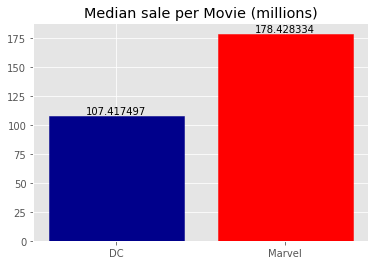

In [19]:
x_axis= ["DC","Marvel"] 
y_axis = [107.417497, 178.428334]

barlist = plt.bar(x_axis,y_axis ,alpha=1, align="center")

barlist[0].set_color('darkblue')
barlist[1].set_color('red')

def autolabel(barlist):
    """
    Attach a text label above each bar displaying its height
    """
    counter =0
    for rect in barlist.get_children():

        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1*height,y_axis[counter],
                ha='center', va='bottom')
        counter +=1
autolabel(barlist)


plt.title("Median sale per Movie (millions)")
plt.savefig("Median_Sales.png")
plt.show()


### Marvel: Number of movies released per Year

In [20]:
marvel_movie_count =marvel_movies.groupby(['Release']).agg({"Film":"size"})
                                                      
marvel_movie_count=pd.DataFrame(marvel_movie_count)
marvel_movie_count.head()

,Film
Release,
1986,1
1989,1
1998,1
2000,1
2002,2


In [21]:
# DC count of movie releases per year
dc_movies_count =marvel_dc_movie_list.loc[marvel_dc_movie_list['Company'] == 'DC'].groupby(['Release']).agg({"Film":"size"})\
                                                                            
dc_movies_count=pd.DataFrame(dc_movies_count)
dc_movies_count.head()


,Film
Release,
1966,1
1978,1
1980,1
1983,1
1984,1


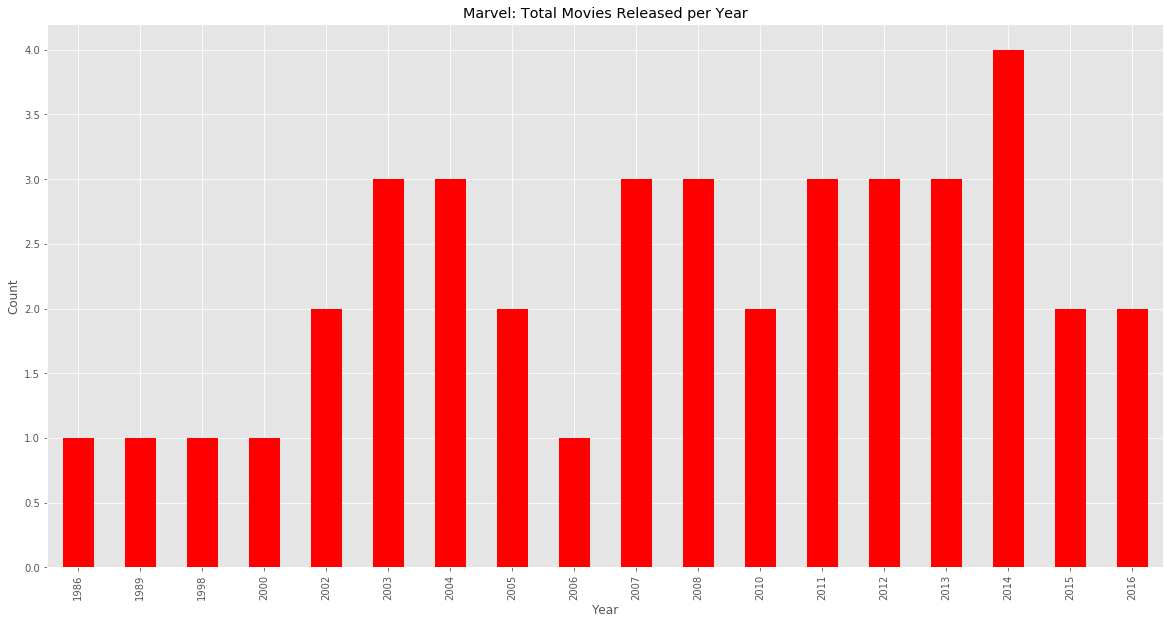

In [22]:
marvel_movie_count["Film"].plot(kind='bar', color ="red",figsize=(20, 10))

plt.title("Marvel: Total Movies Released per Year")
plt.xlabel("Year")
plt.ylabel("Count")

# Incorporate a text label regarding circle size
#plt.text(42, 35, "Note: 1986 Fist feature length film recognized by OMDB and wikipedia"\
#                        "Total number of year with movie produced = 18")

# Save Figure
plt.savefig("Marvel_Count.png")

plt.show()

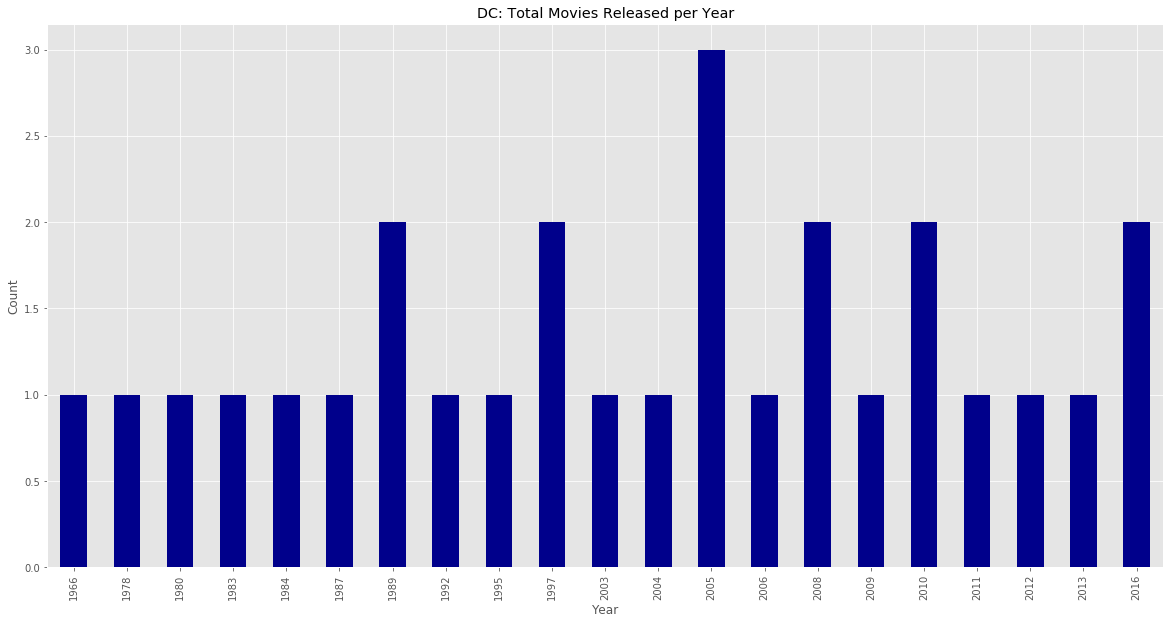

In [23]:
dc_movies_count["Film"].plot(kind='bar', color ="darkblue",figsize=(20, 10))

plt.title("DC: Total Movies Released per Year")
plt.xlabel("Year")
plt.ylabel("Count")

# Incorporate a text label regarding circle size
#plt.text(42, 35, "Note: 1986 Fist feature length film recognized by OMDB and wikipedia"\
#                        "Total number of year with movie produced = 18")

# Save Figure
plt.savefig("DC_Count.png")

plt.show()

In [24]:
marvel_dc_movie_list.groupby('Company')["Film"].count()

Company
DC        28
Marvel    40
Name: Film, dtype: int64

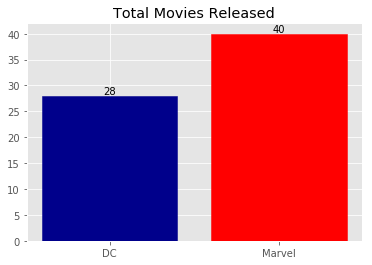

In [25]:
x_axis= ["DC","Marvel"] 
y_axis = [28, 40]

barlist = plt.bar(x_axis,y_axis ,alpha=1, align="center")

barlist[0].set_color('darkblue')
barlist[1].set_color('red')

def autolabel(barlist):
    """
    Attach a text label above each bar displaying its height
    """
    counter =0
    for rect in barlist.get_children():

        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1*height,y_axis[counter],
                ha='center', va='bottom')
        counter +=1
autolabel(barlist)


plt.title("Total Movies Released")
plt.savefig("Total_release.png")
plt.show()


### Super-Hero Movie sales

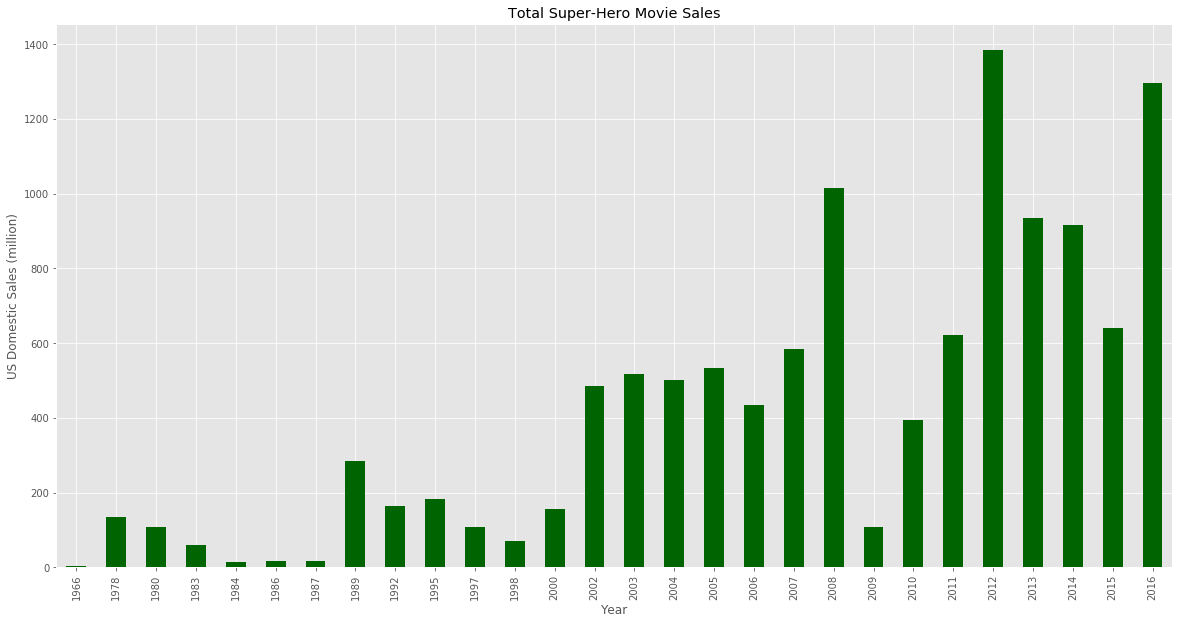

In [26]:
#Total sales of all movies Marvel and DC
both_total_sales =marvel_dc_movie_list.groupby('Release')["Domestic"].sum()

both_total_sales.plot(kind='bar', color ="darkgreen",figsize=(20, 10))


plt.title("Total Super-Hero Movie Sales")
plt.xlabel("Year")
plt.ylabel("US Domestic Sales (million)")

# Incorporate a text label regarding circle size
#plt.text(42, 35, "Note: 1986 Fist feature length film recognized by OMDB and wikipedia"\
#                        "Total number of year with movie produced = 18")

# Save Figure
plt.savefig("Total_sales.png")

plt.show()

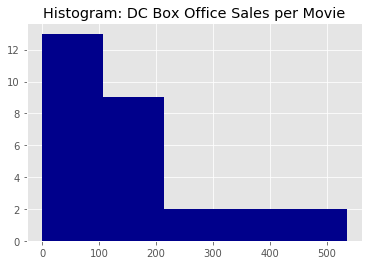

In [27]:
dc_movies["Domestic"].hist(bins=5, color="darkblue")
plt.title("Histogram: DC Box Office Sales per Movie")
plt.savefig("Histogram DC Sales per movie.png")
plt.show()

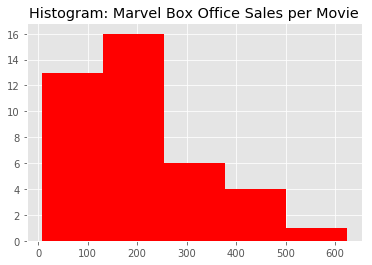

In [28]:
marvel_movies["Domestic"].hist(bins=5, color="red")
plt.title("Histogram: Marvel Box Office Sales per Movie")
plt.savefig("Histogram Marvel Sales per movie.png")
plt.show()

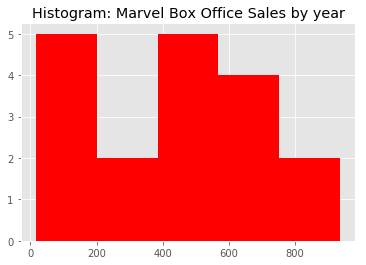

In [29]:
grouped_marvel_movies["Domestic"].hist(bins=5, color ="red")
plt.title("Histogram: Marvel Box Office Sales by year")
plt.savefig("Histogram Marvel Sales by year.png")
plt.show()

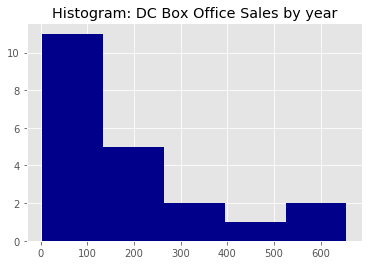

In [30]:
grouped_dc_movies["Domestic"].hist(bins=5, color ="darkblue")
plt.title("Histogram: DC Box Office Sales by year")
plt.savefig("Histogram DC Sales by year.png")
plt.show()

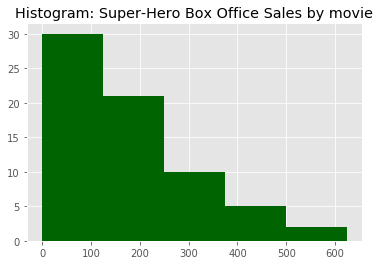

In [31]:
marvel_dc_movie_list["Domestic"].hist(bins=5, color ="darkgreen")
plt.title("Histogram: Super-Hero Box Office Sales by movie")
plt.savefig("Histogram_total_Sales.png")
plt.savefig("Histogram Total Sales.png")
plt.show()


In [32]:
averaged_ratings = pd.read_csv('omdb_averaged_ratings.csv').sort_values(["Release"])
averaged_ratings.head()

,Company_x,Film,Release,Adjusted,Worldwide,Domestic,Foreign,Rated,Director,Internet Movie Database,Rotten Tomatoes,Metacritic,Metascore,imdbVotes,Avg rating
8,DC,Batman: The Movie,1966,22.060185,3.000000,3.000000,NaN,NaN,NaN,0.65,0.86,NaN,NaN,NaN,0.755
0,DC,Superman,1978,1097.039000,300.218018,134.218018,166.000,NaN,NaN,0.73,0.93,NaN,NaN,NaN,0.830
4,DC,Superman II,1980,312.806365,108.185706,108.185706,NaN,NaN,NaN,0.68,0.87,NaN,NaN,NaN,0.775
7,DC,Supergirl,1984,32.782737,14.296438,14.296438,NaN,NaN,NaN,0.43,0.32,NaN,NaN,NaN,0.375
5,Marvel,Howard the Duck,1986,82.524005,37.962774,16.295774,21.667,NaN,NaN,0.46,0.25,NaN,NaN,NaN,0.355


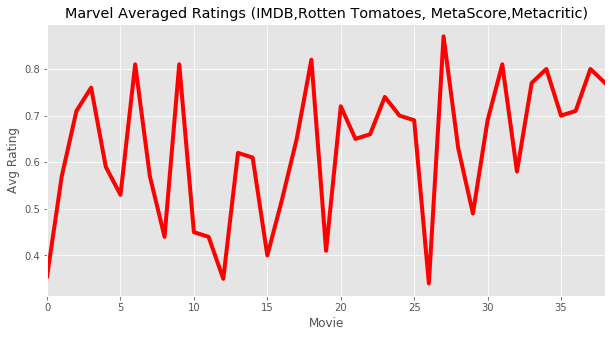

In [39]:
marvel_ratings =averaged_ratings.loc[averaged_ratings['Company_x'] == 'Marvel'].reset_index()
marvel_ratings.head()


marvel_ratings["Avg rating"].plot(kind='line', color ="red", label="Marvel",figsize=(10, 5),linewidth =4)
plt.title("Marvel Averaged Ratings (IMDB,Rotten Tomatoes, MetaScore,Metacritic)")
plt.xlabel("Movie")
plt.ylabel("Avg Rating")
plt.savefig("Marvel Rating.png")

plt.show()

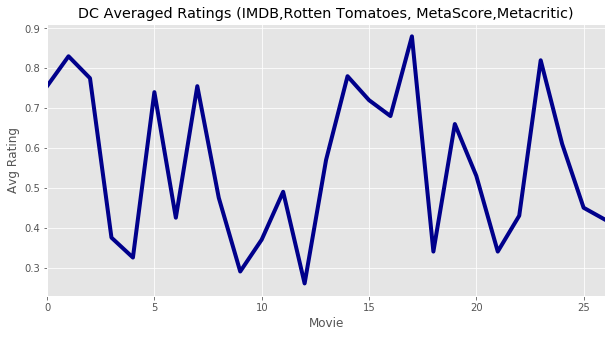

In [38]:
dc_ratings =averaged_ratings.loc[averaged_ratings['Company_x'] == 'DC'].reset_index()
dc_ratings.head()


dc_ratings["Avg rating"].plot(kind='line', color ="darkblue",figsize=(10, 5),linewidth=4)
plt.title("DC Averaged Ratings (IMDB,Rotten Tomatoes, MetaScore,Metacritic)")
plt.xlabel("Movie")
plt.ylabel("Avg Rating")
plt.savefig("DC Rating.png")


plt.show()

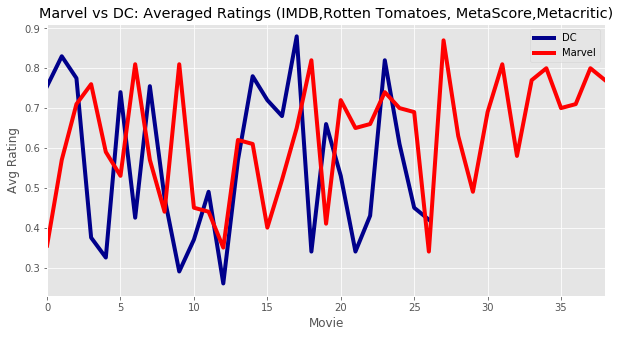

In [40]:
dc_ratings["Avg rating"].plot(kind='line', color ="darkblue", label ="DC",figsize=(10, 5),linewidth=4)
marvel_ratings["Avg rating"].plot(kind='line', color ="red", label="Marvel",figsize=(10, 5),linewidth=4)

plt.title("Marvel vs DC: Averaged Ratings (IMDB,Rotten Tomatoes, MetaScore,Metacritic)")
plt.xlabel("Movie")
plt.ylabel("Avg Rating")
plt.savefig("Marvel v DC Rating.png")

plt.legend(loc="best")
plt.show()

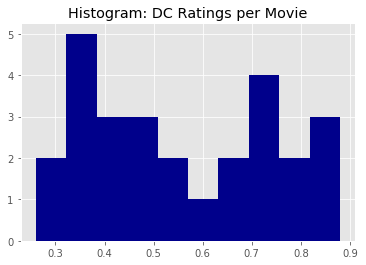

In [30]:
dc_ratings["Avg rating"].hist(bins=10, color="darkblue")
plt.title("Histogram: DC Ratings per Movie")
plt.savefig("Histogram DC rating per movie.png")
plt.show()

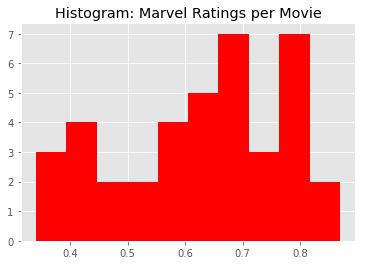

In [31]:
marvel_ratings["Avg rating"].hist(bins=10, color="red")
plt.title("Histogram: Marvel Ratings per Movie")
plt.savefig("Histogram Marvel rating per movie.png")
plt.show()

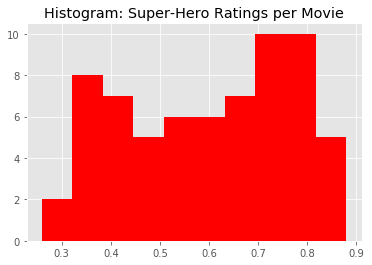

In [32]:
averaged_ratings["Avg rating"].hist(bins=10, color="red")
plt.title("Histogram: Super-Hero Ratings per Movie")
plt.savefig("Histogram Super-Hero rating per movie.png")
plt.show()